In [2]:
import pandas as pd
pd.set_option("display.max_columns", 100)
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Any, Union

IN_CSV_DATA = Path().cwd().parent.parent / "data/3_feature_engineered"
OUT_CSV_DATA = Path().cwd().parent.parent / "data/3_feature_engineered"

In [3]:
df_summary = pd.read_csv(IN_CSV_DATA/'ride_summary_engineered.csv')
df_summary['start_date'] = pd.to_datetime(df_summary['start_date'])
df_summary['start_time'] = pd.to_datetime(df_summary['start_time'])
df_summary['end_time'] = pd.to_datetime(df_summary['end_time'])


In [6]:
numerical_feature_cols = ['total_distance_mi','avg_speed', 'avg_cruising_speed', 'total_ride_time_sec',
                            'total_moving_time_sec', 'total_ascent_ft', 'total_descent_ft', 'hours_since_last_ride',
                            'active_time_ratio', 'avg_climb_rate', 'distance_training_intensity','prior_training_load']
categorical_feature_cols = ['year','month_name', 'start_tod', 'start_dow']
target_cols = ['best_power_4s', 'best_power_5s',
                'best_power_10s', 'best_power_20s', 'best_power_30s', 'best_power_1m',
                'best_power_2m', 'best_power_3m', 'best_power_4m', 'best_power_5m',
                'best_power_6m', 'best_power_10m', 'best_power_20m', 'best_power_30m',
                'best_power_40m', 'best_power_1h', 'best_power_2h']

In [11]:
df_corr_numerical = df_summary[numerical_feature_cols].corr()

In [16]:
df_corr_targets = df_summary[target_cols].corr()

In [18]:
def plot_feature_corr(df_corr:pd.DataFrame, annotate:bool=False):
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(df_corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(8, 6))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    _ = sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=annotate)

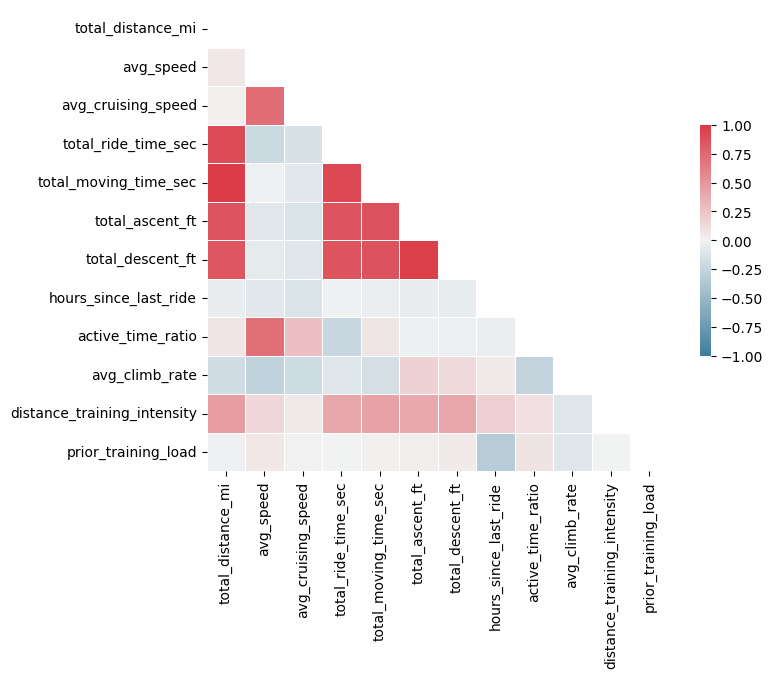

In [19]:
plot_feature_corr(df_corr_numerical)

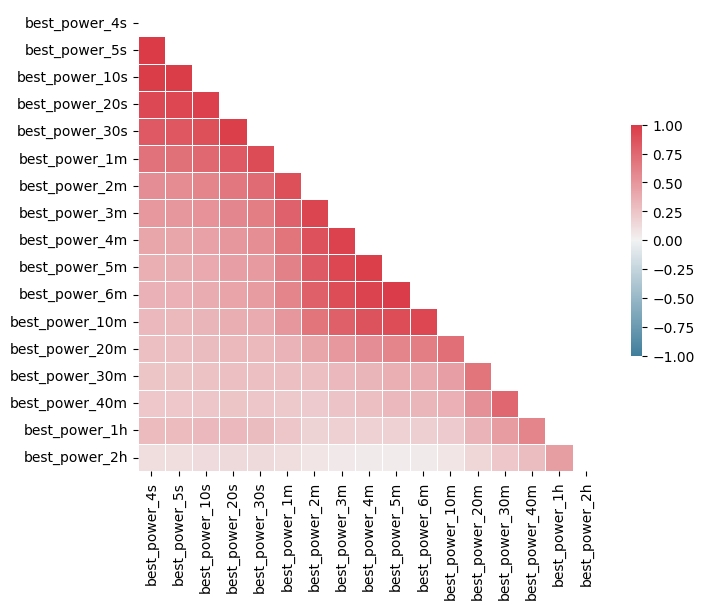

In [20]:
plot_feature_corr(df_corr_targets)